In [1]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

Here, I have read half_preprocessed file which is basically the preprocessed file which was saved and I have taken just the first half rows so it is easier to run it on the kernel.

In [2]:
df =pd.read_csv("half_preprocessed.csv")
X = df['lemma']
y = df['review_stars']
df.head()

,Unnamed: 0.1,Unnamed: 0,text,review_stars,tokens,lemma,stems
0,0,0,What a great addition to the Funk Zone! Grab ...,5,"['What', 'a', 'great', 'addition', 'to', 'the'...",What a great addition to the Funk Zone Grab a ...,what a great addit to the funk zone grab a bit...
1,1,1,Possibly the best breakfast sandwich EVER. On...,5,"['Possibly', 'the', 'best', 'breakfast', 'sand...",Possibly the best breakfast sandwich EVER On a...,possibl the best breakfast sandwich ever on a ...
2,2,2,Pricey ( a ham and cheese croissant was $5.50)...,4,"['Pricey', 'a', 'ham', 'and', 'cheese', 'crois...",Pricey a ham and cheese croissant wa 5 50 a wi...,pricey a ham and chees croissant wa 5 50 as wi...
3,3,3,Are you kidding me? This is without a doubt so...,5,"['Are', 'you', 'kidding', 'me', 'This', 'is', ...",Are you kidding me This is without a doubt som...,are you kid me thi is without a doubt some of ...
4,4,4,"Super slow service, ""salads"" are not very good...",2,"['Super', 'slow', 'service', 'salads', 'are', ...",Super slow service salad are not very good and...,super slow servic salad are not veri good and ...


In [3]:
X_try=X.tolist()
X_try=np.array(X_try)
X_try=X_try.reshape(-1,1)

In [4]:
ros = RandomOverSampler(random_state=777)

In [5]:
X_ROS, y_ROS = ros.fit_resample(X_try, y)

In [6]:
X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)

In [7]:
X_train= X_train.flatten()
x_test= x_test.flatten()

### Linear SVC

Training set score: 0.9766385851705801
Test set score: 0.8872159486965008
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      1442
           2       0.94      0.99      0.96      1437
           3       0.92      0.94      0.93      1466
           4       0.77      0.78      0.77      1430
           5       0.82      0.75      0.78      1398

    accuracy                           0.89      7173
   macro avg       0.88      0.89      0.89      7173
weighted avg       0.89      0.89      0.89      7173



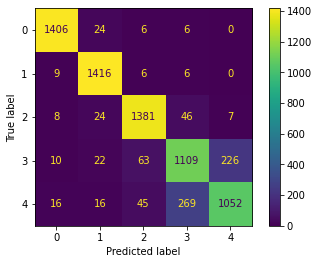

In [8]:
svc_pipeline = newpipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', LinearSVC())])
svc_pipeline.fit(X_train,Y_train)
print('Training set score: ' + str(svc_pipeline.score(X_train,Y_train)))
print('Test set score: ' + str(svc_pipeline.score(x_test,y_test)))
with open('svc_oversample.pickle', 'wb') as f:
        pickle.dump(svc_pipeline, f)
svc_yhat=svc_pipeline.predict(x_test)
svc_cm=confusion_matrix(y_test, svc_yhat)
svc_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm)
svc_disp.plot()
print(metrics.classification_report(y_test, svc_yhat))

### Random Forest 

Training set score: 0.9998207564079584
Test set score: 0.9301547469677959
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1442
           2       1.00      0.99      0.99      1437
           3       0.98      0.97      0.97      1466
           4       0.89      0.80      0.84      1430
           5       0.81      0.90      0.85      1398

    accuracy                           0.93      7173
   macro avg       0.93      0.93      0.93      7173
weighted avg       0.93      0.93      0.93      7173



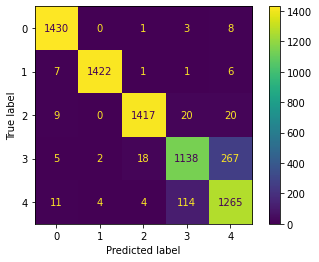

In [9]:
randomforest_pipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', RandomForestClassifier())])
randomforest_pipeline.fit(X_train,Y_train)
print('Training set score: ' + str(randomforest_pipeline.score(X_train,Y_train)))
print('Test set score: ' + str(randomforest_pipeline.score(x_test,y_test)))
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(randomforest_pipeline, f)
rf_yhat=randomforest_pipeline.predict(x_test)
rf_cm=confusion_matrix(y_test, rf_yhat)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot()
print(metrics.classification_report(y_test, rf_yhat))

### Adaboost

Training set score: 0.5106649937264742
Test set score: 0.4942144151679911
              precision    recall  f1-score   support

           1       0.62      0.60      0.61      1442
           2       0.43      0.44      0.43      1437
           3       0.43      0.37      0.40      1466
           4       0.44      0.41      0.42      1430
           5       0.54      0.67      0.60      1398

    accuracy                           0.49      7173
   macro avg       0.49      0.50      0.49      7173
weighted avg       0.49      0.49      0.49      7173



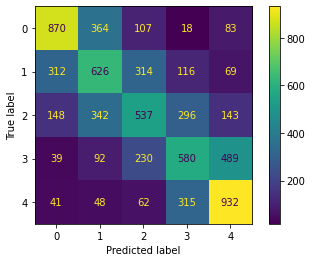

In [10]:
adaboost_pipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', AdaBoostClassifier())])
adaboost_pipeline.fit(X_train,Y_train)
print('Training set score: ' + str(adaboost_pipeline.score(X_train,Y_train)))
print('Test set score: ' + str(adaboost_pipeline.score(x_test,y_test)))
with open('adc_oversample.pickle', 'wb') as f:
    pickle.dump(adaboost_pipeline, f)
adc_yhat=adaboost_pipeline.predict(x_test)
adc_cm=confusion_matrix(y_test, adc_yhat)
adc_disp = ConfusionMatrixDisplay(confusion_matrix=adc_cm)
adc_disp.plot()
print(metrics.classification_report(y_test, adc_yhat))

### K-nearest Neighbours

Training set score: 0.7999641512815917
Test set score: 0.6806078349365677
              precision    recall  f1-score   support

           1       0.77      0.85      0.81      1442
           2       0.73      0.91      0.81      1437
           3       0.62      0.78      0.69      1466
           4       0.57      0.45      0.51      1430
           5       0.69      0.40      0.51      1398

    accuracy                           0.68      7173
   macro avg       0.68      0.68      0.66      7173
weighted avg       0.68      0.68      0.67      7173



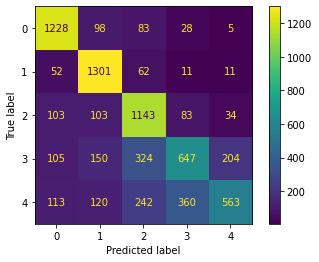

In [11]:
knn_pipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', KNeighborsClassifier())])
knn_pipeline.fit(X_train,Y_train)
print('Training set score: ' + str(knn_pipeline.score(X_train,Y_train)))
print('Test set score: ' + str(knn_pipeline.score(x_test,y_test)))
with open('knn_oversample.pickle', 'wb') as f:
    pickle.dump(knn_pipeline, f)
knn_yhat=knn_pipeline.predict(x_test)
knn_cm=confusion_matrix(y_test, knn_yhat)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_disp.plot()
print(metrics.classification_report(y_test, knn_yhat))

### XGBoost

Training set score: 0.9786102646830376
Test set score: 0.8890283005715879
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1442
           1       0.94      0.99      0.97      1437
           2       0.94      0.93      0.93      1466
           3       0.78      0.80      0.79      1430
           4       0.81      0.76      0.79      1398

    accuracy                           0.89      7173
   macro avg       0.89      0.89      0.89      7173
weighted avg       0.89      0.89      0.89      7173



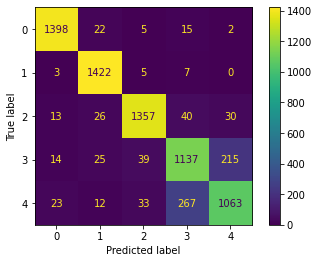

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)
X_ROS, y_ROS = ros.fit_resample(X_try, y)
X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)
xgb_pipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', xgb.XGBClassifier())])
X_train= X_train.flatten()
x_test= x_test.flatten()
xgb_pipeline.fit(X_train,Y_train)
print('Training set score: ' + str(xgb_pipeline.score(X_train,Y_train)))
print('Test set score: ' + str(xgb_pipeline.score(x_test,y_test)))
with open('xgboost_oversample.pickle', 'wb') as f:
    pickle.dump(xgb_pipeline, f)
xgb_yhat=xgb_pipeline.predict(x_test)
xgb_cm=confusion_matrix(y_test, xgb_yhat)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)
xgb_disp.plot()
print(metrics.classification_report(y_test, xgb_yhat))

## Comparison between models

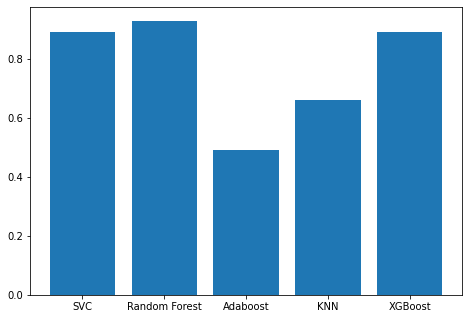

In [13]:
f1_scores = [0.89, 0.93, 0.49, 0.66, 0.89]
models = ['SVC', 'Random Forest', 'Adaboost', 'KNN', 'XGBoost']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,f1_scores)
plt.show()

### Here, from the above graph Random forest gives good results with good F-1 score.